In [1]:
%config Completer.use_jedi = False

In [2]:
import sklearn
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df1 = pd.read_csv('df_for_RF.csv')
df1 = df1.drop('Unnamed: 0', axis = 1)
#df = df1.copy()
df1.drop(['CHILDgender'], axis = 1, inplace = True)
df1.head()

,Subject_ID,diagadhd,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,zfALFF_rTtha_R,zfALFF_rTtha_L,zfALFF_Stha_R,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
0,sub-0015,0,-0.787030,-0.445804,-0.929277,-0.743303,-0.701746,-0.843242,-0.764751,-0.830111,...,0.570004,-0.130038,-0.047269,0.388094,0.158019,0.257226,0.094419,0.157887,0.042376,-0.074321
1,sub-0085,0,-0.601078,-0.304966,-0.397031,-0.381863,-0.449357,-0.341996,-0.347692,-0.348079,...,0.280915,-0.321277,-0.009029,-0.196261,0.080881,0.170051,0.153607,0.192767,-0.052853,0.049870
2,sub-0134,0,-0.799635,-0.231216,-0.840667,-0.901478,-0.487365,-0.710494,-0.512793,-0.807105,...,0.631763,0.249275,0.492542,0.465131,0.149572,0.168241,0.310641,0.219820,0.148504,0.236822
3,sub-0152,0,-0.485006,-0.223685,-0.294288,-0.634390,-0.597999,-0.640255,-0.425914,-0.672409,...,-0.034122,0.082488,0.263105,0.375573,-0.179384,0.009714,0.205987,0.018744,0.069715,0.291880
4,sub-0260,1,-0.853856,-0.356149,-0.863769,-0.617213,-0.475704,-0.797962,-0.641054,-0.861669,...,-0.181578,0.304288,0.449225,0.739805,0.125963,0.116520,0.293805,0.122458,-0.000745,0.174841


In [4]:
for col in df1.columns:
    print(col)

Subject_ID
diagadhd
zfALFF_17Networks_9
zfALFF_17Networks_2
zfALFF_lPFtha_L
zfALFF_cTtha_L
zfALFF_Otha_L
zfALFF_rTtha_R
zfALFF_rTtha_L
zfALFF_Stha_R
zfALFF_Stha_L
zfALFF_mPMtha_L
zfALFF_mPFtha_L
zfALFF_cHipp_L
zfALFF_rHipp_R
zfALFF_rHipp_L
zfALFF_lAmyg_R
zfALFF_lAmyg_L
zfALFF_mAmyg_R
zfALFF_mAmyg_L
zfALFF_17Networks_RH_DefaultB_PFCd_3
zfALFF_17Networks_RH_DefaultB_Temp_1
zfALFF_17Networks_RH_DefaultA_PFCm_4
zfALFF_17Networks_RH_DefaultA_PFCd_2
zfALFF_17Networks_RH_DefaultA_PFCd_1
zfALFF_17Networks_RH_DefaultA_IPL_1
zfALFF_17Networks_RH_ContC_pCun_4
zfALFF_17Networks_RH_ContC_pCun_2
zfALFF_17Networks_RH_ContB_PFCmp_1
zfALFF_17Networks_RH_ContB_PFClv_4
zfALFF_17Networks_RH_ContB_PFCld_3
zfALFF_17Networks_RH_ContB_PFCld_1
zfALFF_17Networks_RH_ContB_IPL_3
zfALFF_17Networks_RH_ContB_IPL_1
zfALFF_17Networks_RH_ContB_Temp_2
zfALFF_17Networks_RH_ContA_Cingm_1
zfALFF_17Networks_RH_ContA_PFCl_5
zfALFF_17Networks_RH_ContA_PFCl_4
zfALFF_17Networks_RH_ContA_PFCl_3
zfALFF_17Networks_RH_ContA_PFCl_2


In [5]:
def ecdf(data):


    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [77]:
x, y = ecdf(df1["zfALFF_17Networks_RH_DorsAttnA_TempOcc_3"])

Text(0, 0.5, 'Cumulative Distribution Function')

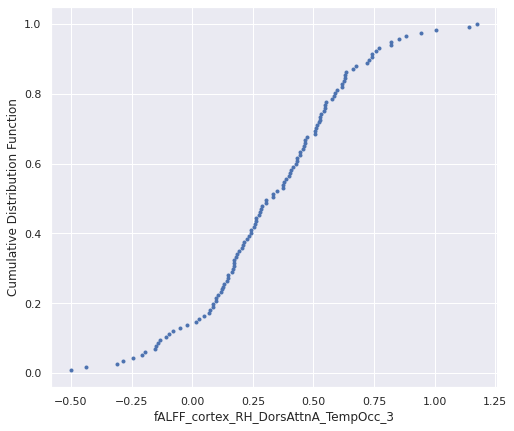

In [78]:
plt.figure(figsize=(8,7))
sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("fALFF_cortex_RH_DorsAttnA_TempOcc_3")
plt.ylabel("Cumulative Distribution Function")

In [79]:
samples = np.random.normal(np.mean(df1["zfALFF_17Networks_RH_DorsAttnA_TempOcc_3"]), np.std(df1["zReHo_17Networks_RH_SomMotB_S2_1"]), size=10000)

In [80]:
x_theor, y_theor = ecdf(samples)

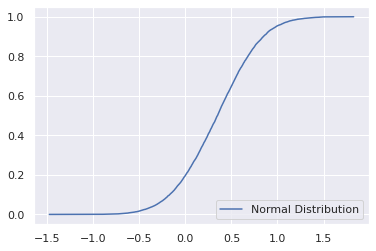

In [81]:
plt.plot(x_theor, y_theor)
plt.legend(('Normal Distribution', 'Empirical Data'), loc='lower right')

In [72]:
#periscope.output(plt)

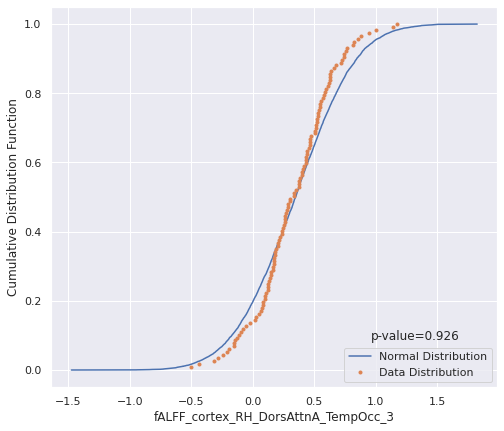

In [83]:
plt.figure(figsize=(8,7))
sns.set()
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("fALFF_cortex_RH_DorsAttnA_TempOcc_3")
plt.ylabel("Cumulative Distribution Function")
plt.legend(('Normal Distribution', 'Data Distribution'), loc='lower right')
plt.figtext(.68, .22, "p-value=0.926")
plt.savefig('/home/tara/Desktop/thesis/thesis_figures/data distribution/falff-2.png')

In [76]:
stats.normaltest(df1["zfALFF_17Networks_RH_DorsAttnA_TempOcc_3"])[1]

0.9262668214382886